In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import median_test
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression as LR

In [5]:
#データの準備
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample.csv',index_col=0,header=None)
sample

,1
0,
2014-10-1,24
2014-10-2,71
2014-10-3,25
2014-10-6,32
2014-10-7,60
2014-10-8,44
2014-10-9,64
2014-10-10,33
2014-10-14,67


In [29]:
train_y = train['y']
train_y 

0       90
1      101
2      118
3      120
4      130
      ... 
202     59
203     50
204     45
205     56
206     40
Name: y, Length: 207, dtype: int64

In [30]:
train_x = train.drop('y',axis=1)
train_x

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6


In [31]:
train_x.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [33]:
test.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


In [34]:
train_x.shape

(207, 11)

In [41]:
train_x.precipitation.unique()

array(['--', '0.5', '0', '1.5', '1', '6', '6.5', '2.5'], dtype=object)

In [37]:
pd.set_option('display.max_rows', 500)
train_x.pivot_table(index=['name' , 'kcal'] , aggfunc=len)

,,datetime,event,payday,precipitation,remarks,soldout,temperature,weather,week
name,kcal,,,,,,,,,
いか天ぷら,438.0,1,1,1,1,1,1,1,1,1
かじきの甘辛煮,370.0,1,1,1,1,1,1,1,1,1
きのこソースハンバーグ,400.0,1,1,1,1,1,1,1,1,1
さわら焼味噌掛け,430.0,1,1,1,1,1,1,1,1,1
さんま辛味焼,450.0,1,1,1,1,1,1,1,1,1
たっぷりベーコンフライ,424.0,1,1,1,1,1,1,1,1,1
ぶりレモンペッパー焼き,450.0,1,1,1,1,1,1,1,1,1
ますのマスタードソース,415.0,1,1,1,1,1,1,1,1,1
アジ唐揚げ南蛮ソース,430.0,1,1,1,1,1,1,1,1,1


In [42]:
train_x.index = pd.to_datetime(train['datetime'])
train_x.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,2013-11-18,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [43]:
test_x = test
test_x.index = pd.to_datetime(test['datetime'])
test_x.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2014-10-01,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
2014-10-02,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2014-10-03,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
2014-10-06,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
2014-10-07,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


In [47]:
train_x.describe()

,soldout,kcal,payday,temperature
count,207.000000,166.000000,10.0,207.000000
mean,0.449275,404.409639,1.0,19.252174
std,0.498626,29.884641,0.0,8.611365
min,0.000000,315.000000,1.0,1.200000
25%,0.000000,386.000000,1.0,11.550000
50%,0.000000,408.500000,1.0,19.800000
75%,1.000000,426.000000,1.0,26.100000
max,1.000000,462.000000,1.0,34.600000


In [48]:
train_x.describe(include='O')

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2013-11-18,水,メンチカツ,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


In [52]:
train_x.loc[train_x['name'] == 'メンチカツ']

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2014-03-05,2014-3-5,水,1,メンチカツ,393.0,NaN,NaN,NaN,雨,1.5,6.1
2014-04-01,2014-4-1,火,1,メンチカツ,377.0,NaN,NaN,NaN,薄曇,--,16.1
2014-05-08,2014-5-8,木,0,メンチカツ,405.0,NaN,NaN,NaN,薄曇,--,21.0
2014-05-14,2014-5-14,水,1,メンチカツ,430.0,NaN,NaN,NaN,薄曇,--,26.0
2014-07-30,2014-7-30,水,0,メンチカツ,441.0,NaN,NaN,NaN,晴れ,--,30.6
2014-09-05,2014-9-5,金,0,メンチカツ,380.0,NaN,NaN,NaN,晴れ,--,30.2


In [53]:
#欠損値補完
train_x.isnull().sum()

datetime           0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [58]:
train_id = pd.to_datetime(train['datetime'])
test_id = pd.to_datetime(test['datetime'])
data_all = pd.concat([train_x,test_x],axis=1)
data_all

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,...,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,,,,,,,,,,
2013-11-18,2013-11-18,月,0.0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-19,2013-11-19,火,1.0,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-20,2013-11-20,水,0.0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-21,2013-11-21,木,1.0,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-22,2013-11-22,金,1.0,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-25,2013-11-25,月,1.0,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-26,2013-11-26,火,0.0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-27,2013-11-27,水,1.0,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-28,2013-11-28,木,0.0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
5     -1.0
6     -1.0
7     -1.0
8     -1.0
9     -1.0
10    -1.0
11    -1.0
12    -1.0
13    -1.0
14    -1.0
15    -1.0
16     0.5
17    -1.0
18    -1.0
19    -1.0
20    -1.0
21    -1.0
22    -1.0
23     0.5
24    -1.0
25    -1.0
26    -1.0
27    -1.0
28    -1.0
29    -1.0
30    -1.0
31    -1.0
32    -1.0
33    -1.0
34    -1.0
35    -1.0
36    -1.0
37    -1.0
38    -1.0
39    -1.0
40    -1.0
41    -1.0
42    -1.0
43    -1.0
44    -1.0
45    -1.0
46    -1.0
47     0.0
48    -1.0
49    -1.0
50    -1.0
51    -1.0
52    -1.0
53    -1.0
54     0.5
55    -1.0
56    -1.0
57    -1.0
58    -1.0
59    -1.0
60    -1.0
61    -1.0
62    -1.0
63     0.0
64    -1.0
65    -1.0
66    -1.0
67     1.5
68    -1.0
69    -1.0
70    -1.0
71    -1.0
72    -1.0
73     0.5
74    -1.0
75    -1.0
76    -1.0
77    -1.0
78     0.5
79    -1.0
80    -1.0
81    -1.0
82     1.5
83    -1.0
84    -1.0
85    -1.0
86    -1.0
87     1.0
88    -1.0
89    -1.0
90    -1.0

In [60]:
#給料支払日の欠損値を0で補完
train['payday'] = train['payday'].fillna(0)
#降水量の欠損を0で補完 数値をfloatへ変更
train['precipitation'] = train['precipitation'].apply(lambda x : -1 if x == '--' else float(x))
#欠損値をなしで補完
train['event'] = train['event'].fillna('なし')
#欠損値をなしで補完
train['remarks'] = train['remarks'].fillna('なし')
#月のカラムを作成
train['month'] = train['datetime'].apply(lambda x : int(x.split('-')[1]))

<AxesSubplot:>

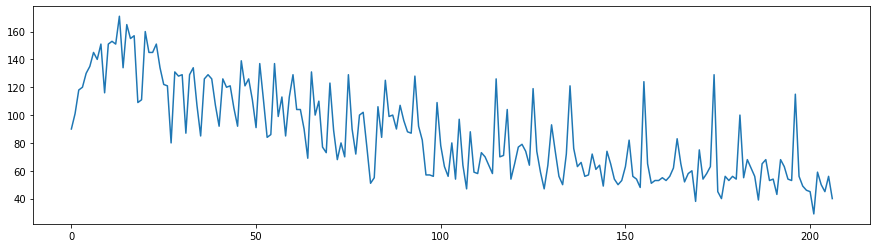

In [61]:
train['y'].plot(figsize=(15,4))

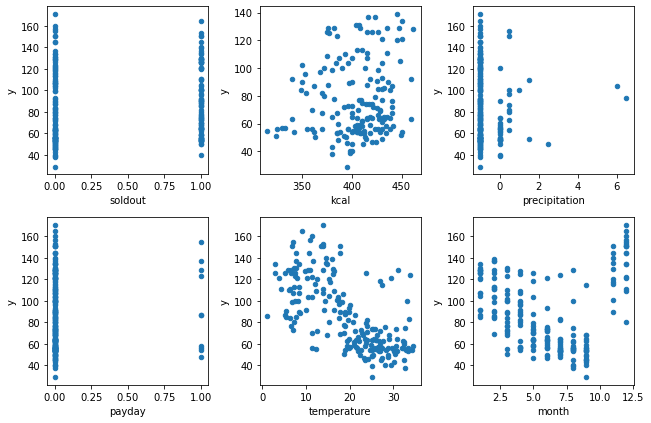

In [64]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()

/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/1833477040.py:7: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.tight_layout()
/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/1833477040.py:7: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  plt.tight_layout()
/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/1833477040.py:7: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  plt.tight_layout()
/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/1833477040.py:7: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  plt.tight_layout()
/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/1833477040.py:7: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  plt.tight_layout()
/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/1

/Users/saitoyuma/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/saitoyuma/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/saitoyuma/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/saitoyuma/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/saitoyuma/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIF

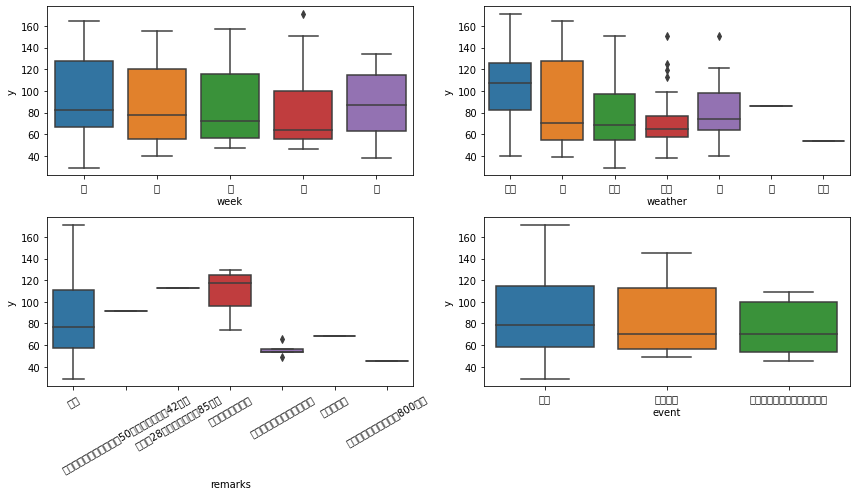

In [66]:
fig, ax = plt.subplots(2,2,figsize=(12,7))
sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="weather",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=30)
sns.boxplot(x="event",y="y",data=train,ax=ax[1][1])
plt.tight_layout()

<AxesSubplot:>

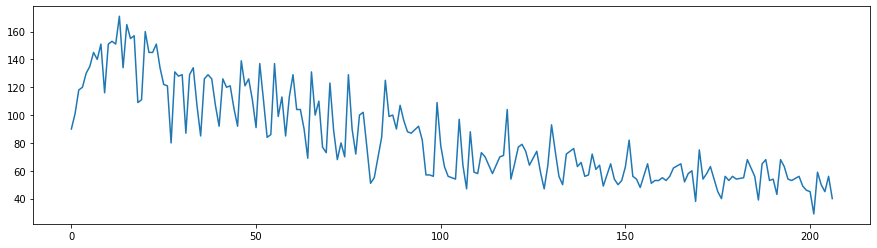

In [67]:
train[train["remarks"]!="お楽しみメニュー"]["y"].plot(figsize=(15,4))

<AxesSubplot:xlabel='fun', ylabel='y'>

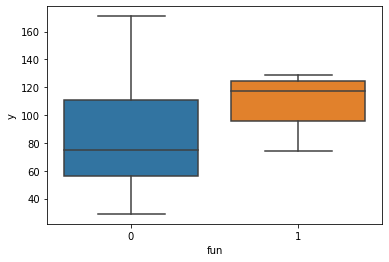

In [68]:
train["fun"] = train["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
sns.boxplot(x="fun",y="y",data=train)

In [70]:
stat,p,med,tbl = median_test(train[train["fun"]==1]["y"],train[train["fun"]==0]["y"])
print("p",p,"stat",stat)

p 0.007057960766247775 stat 7.2581589841730345


<AxesSubplot:>

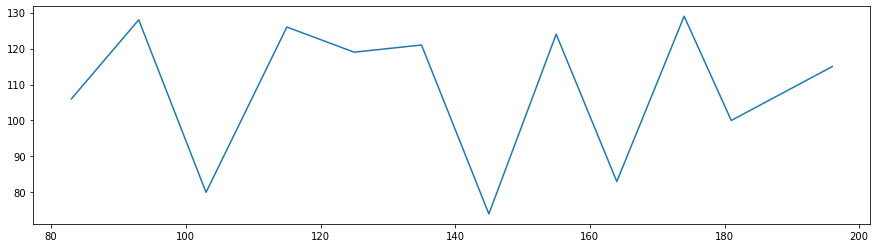

In [71]:
train[train["remarks"]=="お楽しみメニュー"]["y"].plot(figsize=(15,4))

In [72]:
train[train["remarks"]=="お楽しみメニュー"]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,fun
83,2014-3-28,106,金,0,キーマカレー,NaN,お楽しみメニュー,なし,0.0,快晴,-1.0,18.5,3,1
93,2014-4-11,128,金,1,チキンカレー,NaN,お楽しみメニュー,なし,0.0,快晴,-1.0,16.5,4,1
103,2014-4-25,80,金,0,中華丼,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,20.8,4,1
115,2014-5-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,0.0,快晴,-1.0,23.8,5,1
125,2014-5-30,119,金,0,チキンカレー,NaN,お楽しみメニュー,なし,0.0,薄曇,-1.0,26.9,5,1
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,29.5,6,1
145,2014-6-27,74,金,0,牛丼,NaN,お楽しみメニュー,なし,0.0,雨,0.0,25.4,6,1
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,33.9,7,1
164,2014-7-25,83,金,0,ひやしたぬきうどん・炊き込みご飯,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,33.6,7,1
174,2014-8-8,129,金,0,チキンカレー,NaN,お楽しみメニュー,なし,1.0,曇,-1.0,31.1,8,1


<AxesSubplot:xlabel='curry', ylabel='y'>

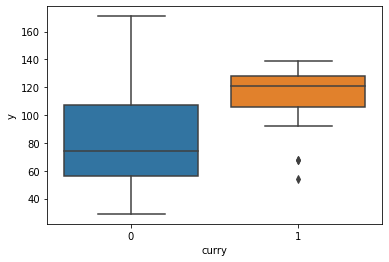

In [73]:
train["curry"] = train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
sns.boxplot(x="curry",y="y",data=train)

In [74]:
stat,p,med,tbl = median_test(train[train["curry"]==1]["y"],train[train["curry"]==0]["y"])
print("p:",p,"stat",stat)

p: 0.010699742900892427 stat 6.514516162828877


# モデルの実装

In [77]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample.csv' , header=None)

In [78]:
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


In [79]:
train_tol = train
train_tol['t'] = 1
test_tol = test
test_tol['t'] = 0
dat = pd.concat([train_tol,test_tol] , sort=True).reset_index(drop=True)
dat

,datetime,event,kcal,name,payday,precipitation,remarks,soldout,t,temperature,weather,week,y
0,2013-11-18,NaN,NaN,厚切りイカフライ,NaN,--,NaN,0,1,19.8,快晴,月,90.0
1,2013-11-19,NaN,NaN,手作りヒレカツ,NaN,--,NaN,1,1,17.0,快晴,火,101.0
2,2013-11-20,NaN,NaN,白身魚唐揚げ野菜あん,NaN,--,NaN,0,1,15.5,快晴,水,118.0
3,2013-11-21,NaN,NaN,若鶏ピリ辛焼,NaN,--,NaN,1,1,15.2,快晴,木,120.0
4,2013-11-22,NaN,NaN,ビッグメンチカツ,NaN,--,NaN,1,1,16.1,快晴,金,130.0
5,2013-11-25,NaN,NaN,鶏の唐揚,NaN,--,NaN,1,1,14.6,曇,月,135.0
6,2013-11-26,NaN,NaN,豚のスタミナ炒め,NaN,--,NaN,0,1,17.9,快晴,火,145.0
7,2013-11-27,NaN,NaN,ボローニャ風カツ,NaN,--,NaN,1,1,14.7,晴れ,水,140.0
8,2013-11-28,NaN,NaN,ハンバーグ,NaN,--,NaN,0,1,17.7,薄曇,木,151.0
9,2013-11-29,NaN,NaN,タルタルinソーセージカツ,NaN,--,NaN,0,1,12.1,快晴,金,116.0


In [81]:
dat.index = pd.to_datetime(dat['datetime'])
dat = dat['2014-05-01':]
dat = dat.reset_index(drop=True)

dat['days'] = dat.index
dat['precipitation'] = dat['precipitation'].apply(lambda x : -1 if x == '--' else x).astype(np.float)
dat['fun'] = dat['remarks'].apply(lambda x : 1 if x == 'お楽しみメニュー' else 0)
dat['curry'] = dat['name'].apply(lambda x : 1 if x.find('カレー')>= 0 else 0)

cols = ['precipitation','weather','days','fun','curry','y']

/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/1559240207.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat['precipitation'] = dat['precipitation'].apply(lambda x : -1 if x == '--' else x).astype(np.float)


In [84]:
def learning(trainX,y_train):
    model1 = LR()
    model2 = RF(n_estimators=100,max_depth=4,random_state=1)
    model1.fit(trainX['days'].values.reshape(-1,1),y_train)
    pred = model1.predict(trainX['days'].values.reshape(-1,1))
    
    #残差を計算
    pred_sub = y_train - pred
    #残差を目的変数にしてモデルを計算
    model2.fit(trainX.iloc[:,~trainX.columns.str.match('y')],pred_sub)
    return model1 , model2

In [89]:
kf = KFold(n_splits=5)
tr = dat[dat["t"]==1][cols]

trains = []
tests = []
for train_index, test_index in kf.split(tr):
    tr.loc[train_index,"tt"] = 1
    tr.loc[test_index,"tt"] = 0
    tr["tt"] = tr["tt"].astype(np.int)
    tmp = pd.get_dummies(tr)
    
    trainX = tmp[tmp["tt"]==1]
    del trainX["tt"]
    testX = tmp[tmp["tt"]==0]
    del testX["tt"]
    y_train = tmp[tmp["tt"]==1]["y"]
    y_test = tmp[tmp["tt"]==0]["y"]
    
    model1, model2 = learning(trainX, y_train)
    
    pred_train = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:, ~trainX.columns.str.match("y")])
    pred_test = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:, ~testX.columns.str.match("y")])
    
    print("TRAIN:",MSE(y_train,pred_train)**0.5, "VARIDATE",MSE(y_test, pred_test)**0.5)
    trains.append(MSE(y_train,pred_train)**0.5)
    tests.append(MSE(y_test, pred_test)**0.5)
print("AVG")
print(np.array(trains).mean(), np.array(tests).mean())

/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/2672469862.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)
/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/2672469862.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

TRAIN: 7.668781184089254 VARIDATE 11.277589649773077
TRAIN: 7.910098315158314 VARIDATE 10.154098904131104
TRAIN: 8.360886493884317 VARIDATE 8.93443052838927


/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/2672469862.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)
/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/2672469862.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

TRAIN: 7.8938636281693455 VARIDATE 19.390799193049748
TRAIN: 7.963310279486665 VARIDATE 9.807293021736502
AVG
7.9593879801575795 11.912842259415939


/var/folders/ww/2r82ppr146b3q904dk54t0mr0000gn/T/ipykernel_4800/2672469862.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)


In [90]:
cols = ["precipitation","weather","days","fun","curry","y","t"]
tmp = pd.get_dummies(dat[cols])
trainX = tmp[tmp["t"]==1]
del trainX["t"]
testX = tmp[tmp["t"]==0]
del testX["t"]
y_train = tmp[tmp["t"]==1]["y"]
y_test = tmp[tmp["t"]==0]["y"]

RMSE 8.102085586348183


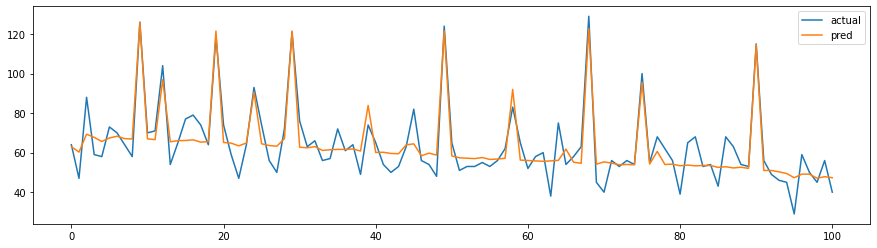

In [91]:
model1, model2 = learning(trainX,y_train)
pred = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:,~trainX.columns.str.match("y")])

p = pd.DataFrame({"actual":y_train,"pred":pred})
p.plot(figsize=(15,4))
print("RMSE",MSE(y_train,pred)**0.5)


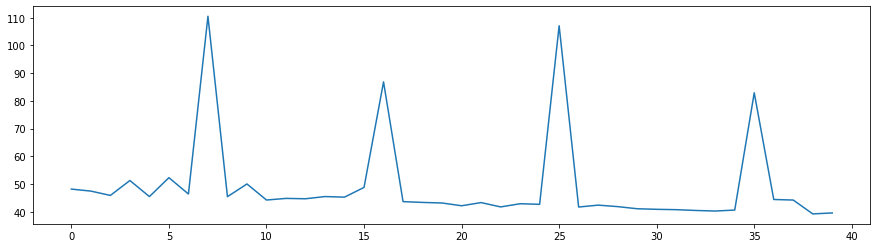

In [92]:
model1, model2 = learning(trainX,y_train)
pred = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:,~testX.columns.str.match("y")])
plt.figure(figsize=(15,4))
plt.plot(pred)

In [93]:
sample[1] = pred
sample.to_csv("submit/submit01.csv",index=None,header=None)